In [3]:
import xgboost as xgb
from sklearn import datasets

In [5]:
X, y= datasets.load_breast_cancer(return_X_y=True)
type(X), type(y)
X.shape, y.shape

(numpy.ndarray, numpy.ndarray)

((569, 30), (569,))

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape

(114, 30)

In [11]:
dtrain= xgb.DMatrix(X_train, label=y_train)
type(dtrain)

xgboost.core.DMatrix

In [12]:
dtest= xgb.DMatrix(X_test)

In [8]:
import os
os.cpu_count()

20

In [9]:
params= {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'gamma': 0.2,
    'lambda': 3,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'min_child_weight': 3,
    'eta': 0.001,
    'seed': 42,
    'nthread': 20
}

In [10]:
num_round= 1000
model= xgb.train(params, dtrain, num_round)
model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score


y_pred= model.predict(dtest) # probability
y_binary= y_pred>0.5
accuracy= accuracy_score(y_test, y_binary)
print(f'Accuracy: {accuracy*100:.2f}%')
recall= recall_score(y_test, y_binary)
print(f'Recall: {recall*100:.2f}%')
precision= precision_score(y_test, y_binary)
print(f'Precision: {precision*100:.2f}%')
f1= f1_score(y_test, y_binary)
print(f'F1: {f1*100:.2f}%')
auc= roc_auc_score(y_test, y_pred)
print(f'AUC: {auc*100:.2f}%')

Accuracy: 95.61%
Recall: 98.59%
Precision: 94.59%
F1: 96.55%
AUC: 99.48%


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

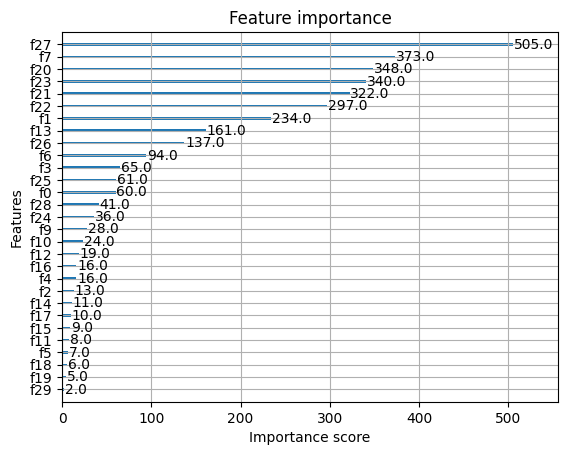

In [16]:
xgb.plot_importance(model)